--- Loading Data ---
Data Loaded: (33723, 16)

--- PCA Analysis ---
Number of components to explain 90% variance: 5
Saved: pca_eigenspectrum.png (Eigenspectrum/Cumulative Plot)


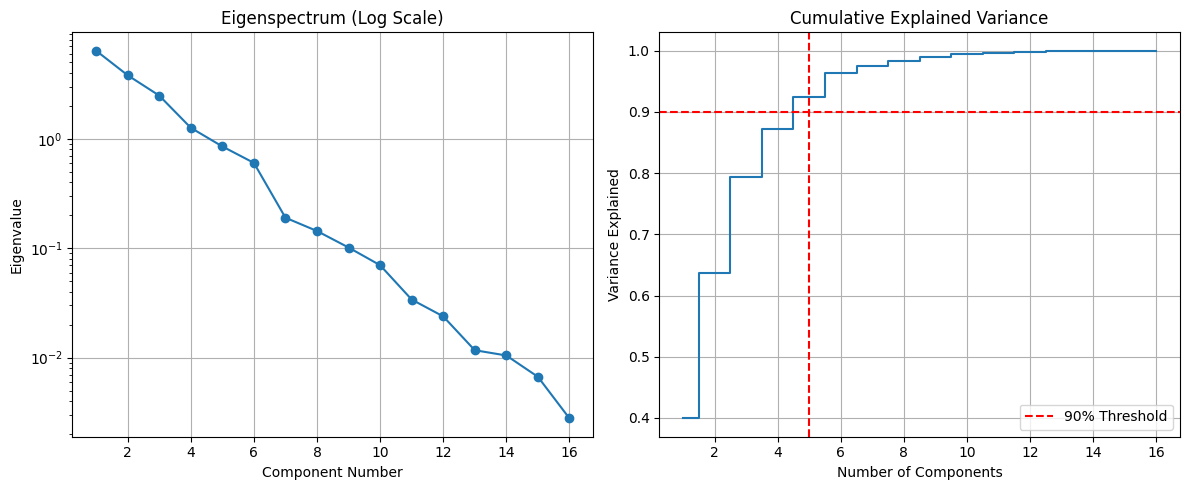

Saved: pca_projection.png (PCA Scatter Plot)


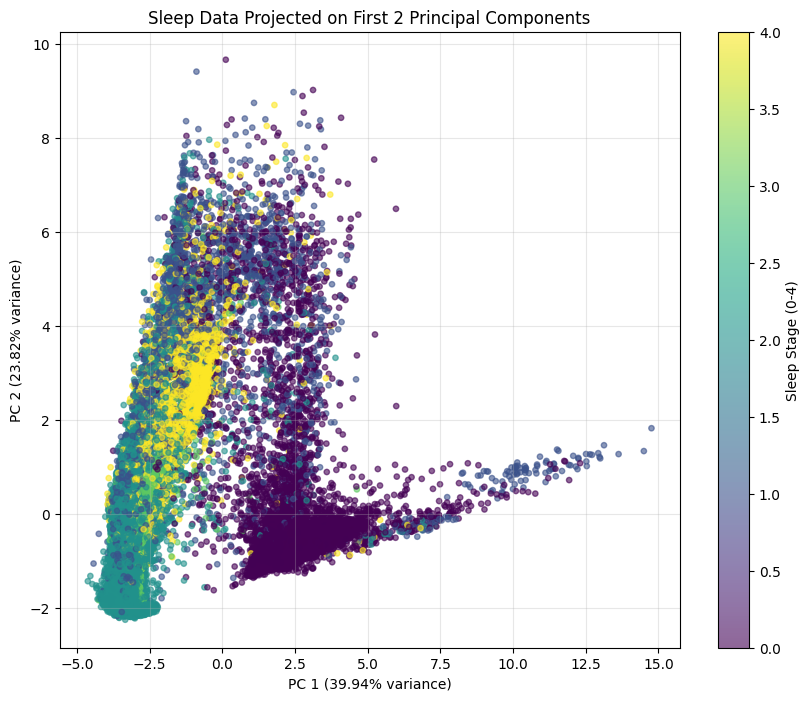


--- Clustering Comparison ---
Random Init Cost (Inertia): 166129.21
K-Means++ Cost (Inertia):   157343.52
Saved: clustering_comparison.png (Clustering Comparison)


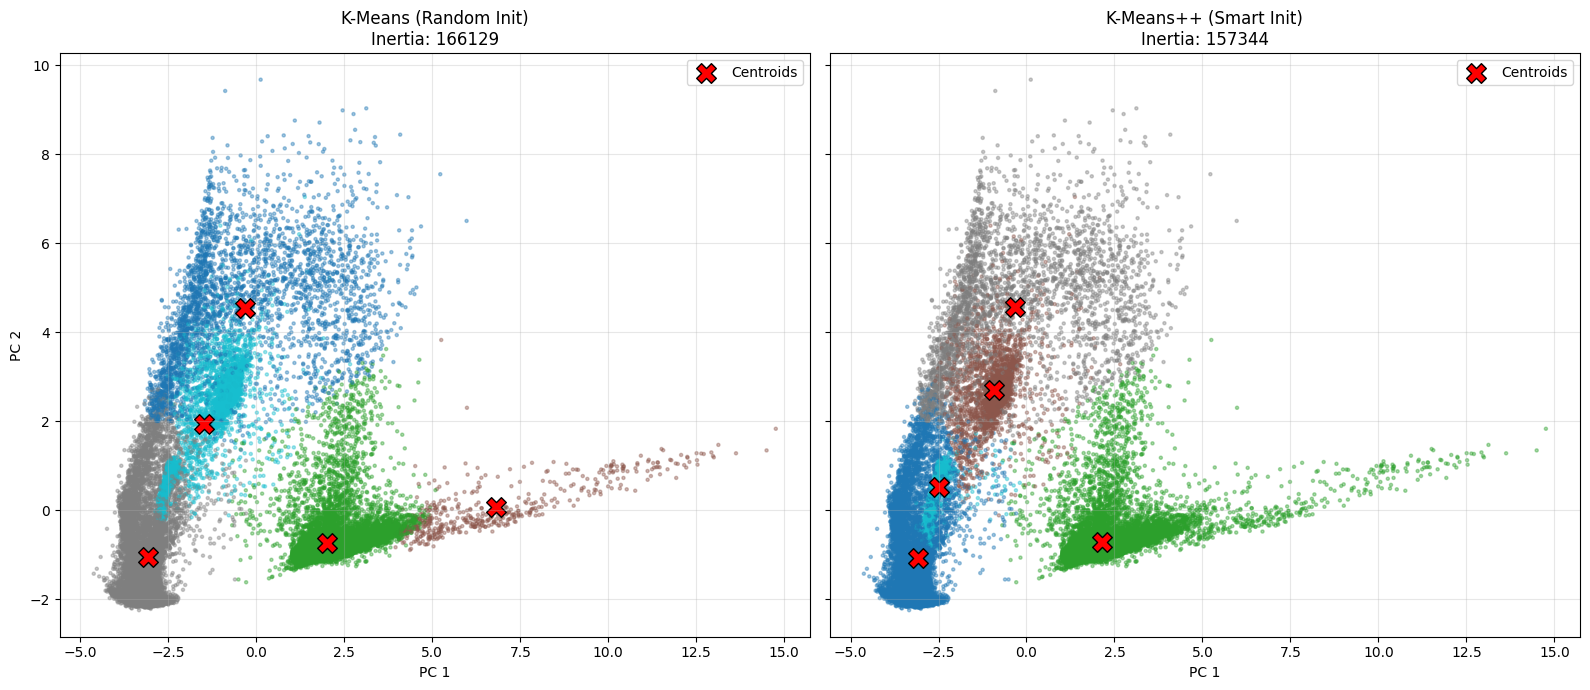

All three required plots are now saved to your notebook directory.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -----------------------------------------------------------------
# PART 1: Data Loading & Preprocessing
# -----------------------------------------------------------------
print("--- Loading Data ---")
try:
    X_train = pd.read_csv("X_train.csv").values
    y_train = pd.read_csv("y_train.csv").values.ravel()
    print(f"Data Loaded: {X_train.shape}")
except FileNotFoundError:
    print("Error: Please upload X_train.csv and y_train.csv")

# Standardize the data (Crucial for PCA and K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# -----------------------------------------------------------------
# PART 2: Principal Component Analysis (Task 2.1)
# -----------------------------------------------------------------
print("\n--- PCA Analysis ---")
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Eigenspectrum (Slide 30 style)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find components needed for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain 90% variance: {n_components_90}")

# Plot Eigenspectrum (Figure 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.yscale('log')
plt.title('Eigenspectrum (Log Scale)')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=n_components_90, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True)

plt.tight_layout()
# --- Saving Plot 1 ---
plt.savefig('pca_eigenspectrum.png')
print("Saved: pca_eigenspectrum.png (Eigenspectrum/Cumulative Plot)")
plt.show()

# 2. 2D Projection (PC1 vs PC2) (Figure 2)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6, s=15)
plt.colorbar(scatter, label='Sleep Stage (0-4)')
plt.xlabel(f'PC 1 ({explained_variance_ratio[0]:.2%} variance)')
plt.ylabel(f'PC 2 ({explained_variance_ratio[1]:.2%} variance)')
plt.title('Sleep Data Projected on First 2 Principal Components')
plt.grid(True, alpha=0.3)
# --- Saving Plot 2 ---
plt.savefig('pca_projection.png')
print("Saved: pca_projection.png (PCA Scatter Plot)")
plt.show()

# -----------------------------------------------------------------
# PART 3: Clustering Comparison (Task 2.2 & 2.3)
# -----------------------------------------------------------------
print("\n--- Clustering Comparison ---")

# 1. Standard K-Means (Random Init)
kmeans_random = KMeans(n_clusters=5, init='random', n_init=1, random_state=42)
kmeans_random.fit(X_scaled)
centers_random_pca = pca.transform(kmeans_random.cluster_centers_)

# 2. K-Means++ (Smart Init)
kmeans_pp = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans_pp.fit(X_scaled)
centers_pp_pca = pca.transform(kmeans_pp.cluster_centers_)

print(f"Random Init Cost (Inertia): {kmeans_random.inertia_:.2f}")
print(f"K-Means++ Cost (Inertia):   {kmeans_pp.inertia_:.2f}")

# Visualization: Compare Clusters (Figure 3)
fig, ax = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Plot 1: Random Init Results
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_random.labels_, cmap='tab10', s=5, alpha=0.4)
ax[0].scatter(centers_random_pca[:, 0], centers_random_pca[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Centroids')
ax[0].set_title(f'K-Means (Random Init)\nInertia: {kmeans_random.inertia_:.0f}')
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[0].legend()
ax[0].grid(True, alpha=0.3)

# Plot 2: K-Means++ Results
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pp.labels_, cmap='tab10', s=5, alpha=0.4)
ax[1].scatter(centers_pp_pca[:, 0], centers_pp_pca[:, 1], c='red', s=200, marker='X', edgecolors='black', label='Centroids')
ax[1].set_title(f'K-Means++ (Smart Init)\nInertia: {kmeans_pp.inertia_:.0f}')
ax[1].set_xlabel('PC 1')
ax[1].grid(True, alpha=0.3)
ax[1].legend()

plt.tight_layout()
# --- Saving Plot 3 ---
plt.savefig('clustering_comparison.png')
print("Saved: clustering_comparison.png (Clustering Comparison)")
plt.show()

print("All three required plots are now saved to your notebook directory.")